# Introduction:

In this lab, we will work with a medical dataset and try to build a model to detect heart diseases with the information given in the dataset. Our model will be a Supervised model as our dataset has a label. Moreover, our label is a binary classification as our model must be able to predict whether a patient has heart disease or not.

## About the data:

This is a medical dataset which includes medical records of 918 patients. It also includes 12 features regarding each patient such as their age or sex. The last feature given in the dataset, named HeartDisease, is binary and given in one's and zero's, indicating whether a patient has a heart disease, 1, or does not suffer from a heart disease, 0. we will look more into the data ahead.

## About the model (Decision tree Algorithm)

Decision tree learning is a supervised learning approach used in statistics, data mining and machine learning. In this formalism, a classification or regression decision tree is used as a predictive model to draw conclusions about a set of observations.

Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels.

## Another feature used in the model (Grid search Algorithm)

For the hyperparameter optimization of our model we will use the grid search algorithm. Grid search is a process that searches exhaustively through a manually specified subset of the hyperparameter space of the targeted algorithm.

# Importing the libraries

The first thing that we need to do is to import all the libraries necessary for our work in this lab.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import minmax_scale
import itertools
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV

# Calling the data

The data is stored in my system locally so I will just call the data from my hard drive.

In [2]:
df=pd.read_csv("E:/Reza/New folder/Python/Datasets/heart.CSV")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data Cleaning

Before building our model, we need to look into our data carefully to see if there are any modifications that we can do to help build a better model. These modifications could be data cleaning, feature selection, feature extraction, data normalization and.... Here, there is an issue with the data in that it is filled with non numeric data which cannot be processed by the model. What I will now do is to turn these non-numeric data to numeric data:

In [3]:
df.dtypes
#we see that features such as sex or ChestPainType are not integer or float and thus cannot be processed by the computer.

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [4]:
#Good news is the they are all part of category and we can turn those into numbers like below:
df["ST_Slope"][df["ST_Slope"]=='Flat']=2
df["ST_Slope"][df["ST_Slope"]=='Up']=0
df["ST_Slope"][df["ST_Slope"]=='Down']=1
df["Sex"][df["Sex"]=='M']=0
df["Sex"][df["Sex"]=='F']=1
df["ChestPainType"][df["ChestPainType"]=='ASY']=3
df["ChestPainType"][df["ChestPainType"]=='NAP']=1
df["ChestPainType"][df["ChestPainType"]=='ATA']=0
df["ChestPainType"][df["ChestPainType"]=='TA']=2
df["RestingECG"][df["RestingECG"]=='LVH']=0
df["RestingECG"][df["RestingECG"]=='Normal']=1
df["RestingECG"][df["RestingECG"]=='ST']=0
df["ExerciseAngina"][df["ExerciseAngina"]=='N']=0
df["ExerciseAngina"][df["ExerciseAngina"]=='Y']=1

In [5]:
#After turning them into numeric value, the computer still views them as object rather than an Integer:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
#So now the only thing we must do is to change the numbers from object into integer:
df['Sex'] = df['Sex'].astype('int')
df['ChestPainType'] = df['ChestPainType'].astype('int')
df['RestingECG'] = df['RestingECG'].astype('int')
df['ExerciseAngina'] = df['ExerciseAngina'].astype('int')
df['ST_Slope'] = df['ST_Slope'].astype('int')
df.dtypes

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int32
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object

## Checking for missing value

We should also check and see if our data contains any missing value (null)

In [7]:
df.isnull().sum()
#We see that we have no missing value in our data

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Data Analysis & Data Visualization

Before building the model we will look further into the data to build a good intuition regarding the data. We will also use data visualization tools to help us in building our intuition.

In [8]:
df.describe()
#This code is very useful and will give an overview of the data and where the most data points for each feature is
#For example we see that the age for most our 918 patients fall in the range of 47 to 60

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,1.942266,132.396514,198.799564,0.233115,0.601307,136.809368,0.404139,0.887364,1.070806,0.553377
std,9.432617,0.407701,1.230271,18.514154,109.384145,0.423046,0.489896,25.460334,0.490992,1.066570,0.963000,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,0.000000,1.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,3.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,0.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,1.000000,202.000000,1.000000,6.200000,2.000000,1.000000


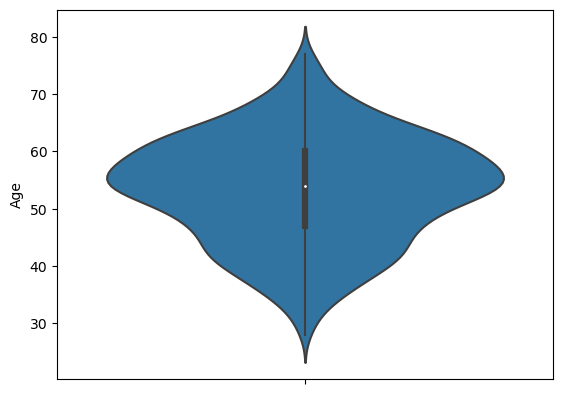

In [9]:
sb.violinplot(y=df['Age'])
plt.show()
#This data visualization also confirms what we mentioned above, this violinplot show the density for our Age feature.

In [10]:
corr=df.corr()
corr
#this code is also another very useful and helpful code as it shows the corelation between features and that which feature is effected by which feture to what extend
#For example if we look at the last section of the table ("HeartDisease"), we see that 'ST_Slope' & 'ChestPainType' respectively features have the most effect on someone having heart disaese or not (respectively 60% and 53%)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055750,0.210128,0.254399,-0.095282,0.198039,-0.230566,-0.382045,0.215793,0.258612,0.229156,0.282039
Sex,-0.055750,1.000000,-0.199711,-0.005133,0.200092,-0.120076,0.010634,0.189186,-0.190664,-0.105734,-0.137949,-0.305445
ChestPainType,0.210128,-0.199711,1.000000,0.063102,-0.142636,0.155795,-0.096133,-0.350695,0.421398,0.316083,0.385444,0.536974
RestingBP,0.254399,-0.005133,0.063102,1.000000,0.100893,0.070193,-0.116851,-0.112135,0.155101,0.164803,0.100997,0.107589
Cholesterol,-0.095282,0.200092,-0.142636,0.100893,1.000000,-0.260974,-0.038470,0.235792,-0.034166,0.050148,-0.074839,-0.232741
FastingBS,0.198039,-0.120076,0.155795,0.070193,-0.260974,1.000000,-0.093028,-0.131438,0.060451,0.052698,0.138786,0.267291
RestingECG,-0.230566,0.010634,-0.096133,-0.116851,-0.038470,-0.093028,1.000000,0.023801,-0.072924,-0.116719,-0.064919,-0.091580
MaxHR,-0.382045,0.189186,-0.350695,-0.112135,0.235792,-0.131438,0.023801,1.000000,-0.370425,-0.160691,-0.375195,-0.400421
ExerciseAngina,0.215793,-0.190664,0.421398,0.155101,-0.034166,0.060451,-0.072924,-0.370425,1.000000,0.408752,0.432978,0.494282
Oldpeak,0.258612,-0.105734,0.316083,0.164803,0.050148,0.052698,-0.116719,-0.160691,0.408752,1.000000,0.378955,0.403951


<Axes: >

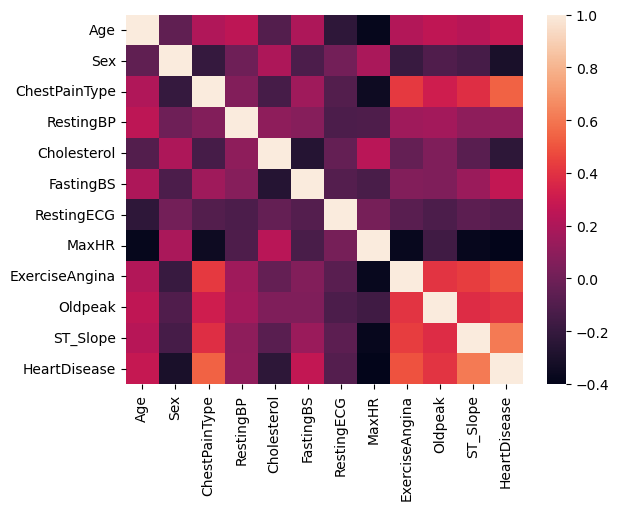

In [11]:
#Again, we can confirm our findings above with a data visualization
#Here we will use the same corelation table from above but in a visualization:
sb.heatmap(corr)
#Here again our findings from above is confirmed as 'ST_Slope' &'ChestPainType' respectively have the brightest color in the "HeartDisease" section (meaning they have the most corealtion)

# Data Normalization

One more step before building the model is needed and that is data normalization. Data normalization is the practice of organizing data entries to ensure they appear similar across all fields and records. It usually helps one to build a better model as the computations will be done more smoothly.

## MinMaxScaler

MinMaxScaler is a popular data normalization that scales the data to a fixed range, typically between 0 and 1.

In [12]:
scale_df=minmax_scale(df, feature_range=(0,1))
#After scaling the data, the data will be a combination of raw numbers in ndarray numpy format and no longer in the pandas data frame which we need
#So now we will bring those numbers after normalization and put them in our original data frame using the pandas library: 
df=pd.DataFrame(scale_df , index=df.index, columns=df.columns)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,0.0,0.000000,0.70,0.479270,0.0,1.0,0.788732,0.0,0.295455,0.0,0.0
1,0.428571,1.0,0.333333,0.80,0.298507,0.0,1.0,0.676056,0.0,0.409091,1.0,1.0
2,0.183673,0.0,0.000000,0.65,0.469320,0.0,0.0,0.267606,0.0,0.295455,0.0,0.0
3,0.408163,1.0,1.000000,0.69,0.354892,0.0,1.0,0.338028,1.0,0.465909,1.0,1.0
4,0.530612,0.0,0.333333,0.75,0.323383,0.0,1.0,0.436620,0.0,0.295455,0.0,0.0


# Model

Now, we will build the model. First we will split the data into four parts: X_train(features of the data given to the model to train on and learn from), y_train(given label for the corresponding features in X_train for the computer to train on and learn from), X_test(given features to the computer so the computer would give the labels based on the model and algorithm that it trained on), y_test(the hold-out labels corresponding to the features in the X_test (the real labels for hose records) this is used to test the models accuracy)

In [13]:
#The 'HeartDisease' feature is our label so we drop it from our x section which is only the given features
#And our y, which is only the label will be the 'HeartDisease'
x=df.drop(['HeartDisease'],axis=1)
y=df.HeartDisease

#we split the data into the 4 parts mentioned above and use the test size 0.3, meaning that 70% of the data will be trained on and 30% will be used to test our model
X_train,X_test,y_train,y_test= train_test_split(x,y, test_size=0.3)
#Finally we will use .shape to see shape and size of each part of our data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((642, 11), (276, 11), (642,), (276,))

In [14]:
#First we will call the decision tree model
DT= DecisionTreeClassifier()

#since we want to use the grid search algorithm with the decision tree model, we will first identify the parameters that we want the grid search algorithm to inspect
#the parameters of the model will be wtitten in a dictionary with each parameter mentioned and the options avaliable for each parameter
parametr={'criterion':['gini','entropy', 'log_loss'],
          'max_depth':[4,6,8,12,15,20,35],
          'min_samples_split':[4,6,7,8],
          'min_samples_leaf':[2,3,4]}
#there are more parameters and more options for a DT classifier but for now we just use this much of the model's capacity
GS= GridSearchCV(DT,parametr,cv=20,scoring='accuracy')
#a point that has to be mentioned here is that we are not yet using the model but we are just using the grid search algorithm to find the best paramters for the model
#Thus we don't fit the algorithm on X_train and Y_train because now we are just looking for the best paramteters and thus we fit it on the entier data (x,y)
GS.fit(x,y)

GridSearchCV(cv=20, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 6, 8, 12, 15, 20, 35],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [4, 6, 7, 8]},
             scoring='accuracy')

In [15]:
#With this code we will see the best parameters for the DT classifier for our data given by the grid search algorithm
GS.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 4}

In [16]:
#This is the best score for our model, meaning the if we use the best parameters given above for our model we will get this level of accuracy
GS.best_score_

0.8418840579710146

In [17]:
GS.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       min_samples_split=4)

In [18]:
#Now we will use the parameters given by the grid search algorithm in our DT classifier model
DT= DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2, min_samples_split=4)
#Here we fit our model on our data and use it to predict
DT.fit(X_train,y_train)
pred=DT.predict(X_test)

# Model Evaluation

Here we will test the performance of our model and see how well it has done based on metrics such as accuracy, recall score and...

In [19]:
#Accuracy score checks the accuracy of our model
acc=accuracy_score(y_test,pred)

#Recall score is also known as sensitivity or the true positive rate, The higher the recall score, the better the machine learning model is at identifying both positive and negative examples.
rec=recall_score(y_test,pred)

#precision score measures the proportion of positively predicted labels that are actually correct. Precision is also known as the positive predictive value
pre=precision_score(y_test,pred)

#F1 score represents the model score as a function of precision and recall score.
#F-score is a machine learning model performance metric that gives equal weight to both the Precision and Recall
f1=f1_score(y_test,pred)
print('The accuracy of the model is ',acc)
print('The recall score of the model is ',rec)
print('The precision score of the model is ',pre)
print('The f1 score of the model is ',f1)

The accuracy of the model is  0.8659420289855072
The recall score of the model is  0.9172413793103448
The precision score of the model is  0.8417721518987342
The f1 score of the model is  0.877887788778878


In [20]:
#For classification problems, one of the best metrics of evaluating the model is called Confusion matrix
#In a Confusion matrix each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class, or vice versa
#Here I will draw a Confusion matrix for the model to see how our model has done on the data:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix
[[106  25]
 [ 12 133]]


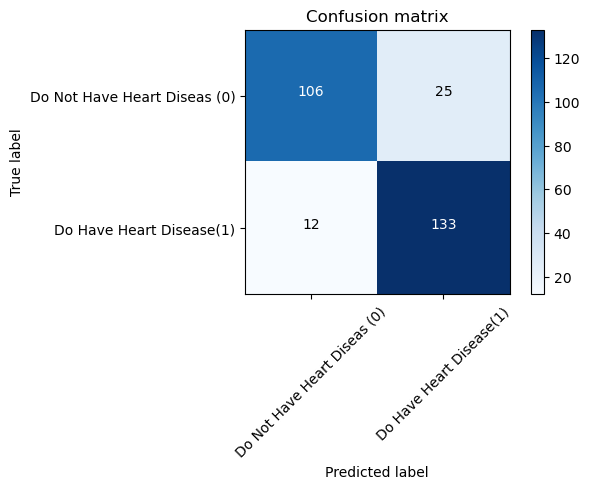

In [21]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred, labels=[0,1])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Do Not Have Heart Diseas (0)','Do Have Heart Disease(1)'],normalize= False,  title='Confusion matrix')

# Conclusion

In this lab we tried to build a Decision tree model to predict heart diseases with the given dataset. We made some modifications so that it better fits our model and also analyzed the data to get a better intuition of our data. I also used the grid search algorithm for fine tunning and hyperparameter optimization of the model. Finally i evaluated the model with standard well-known classifiction model metrics such as f1 score and Confusion matrix.

# Refrences

Note that I have used codes and peices of information from other sources in this lab such as IBM, Andrew NG, Coursera platform, Wikipedia website and the https://vitalflux.com/ website.